# <font color='brown'>Introduction:</font>
<font color='blue'>Heart disease</font> is a collection of diseases and conditions that cause cardiovascular problems. Each type of heart disease is caused by something unique to that condition. Atherosclerosis and CAD result from plaque buildup in the arteries. Other causes of heart disease are described below Our goal in this notebook is to investigate some features that could correlate with the future appearance of heart diseaselike gender, blood sugar serum cholesterol.

<br> The main approaches are:
<br>**EDA on the data-set as making some investigations**
<br>**What are the most valuable features?**
<br>**Does our data set contain outliers?**
<br>**Can we build a trusted machine learning model to classify?**
<br>**What are proportions of some features?**


**Used libraries**

In [1]:
import pandas              as pd       # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy               as np       # linear algebra 
import seaborn             as sns      # Graphical usage
import matplotlib.pyplot   as plt      # Graphical usage
import matplotlib.style    as style    # Graphical usage
import matplotlib.gridspec as gridspec # Graphical usage
from scipy import stats                # Statical  usage
from sklearn.feature_selection import mutual_info_regression # Feature engineering
from sklearn.decomposition import PCA  # Principle Component Analysis
from sklearn.preprocessing import StandardScaler #Normalization
import tensorflow as tf #Machine learning inviroment
import warnings
warnings.filterwarnings('ignore')

**EDA**

> I got the data-set from kaggle citation to this link <br>
https://www.kaggle.com/fedesoriano/heart-failure-prediction

> Firstly data cleaning and exploration

In [2]:
Heart_df = pd.read_csv('heart.csv')
Heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**ChestPainType: ranging from a sharp stab to a dull ache**
<br>**RestingBP: resting blood pressure**
<br>**Cholesterol: serum cholesterol**
<br>**FastingBS: fasting blood sugar**
<br>**RestingECG: resting electrocardiogram results**
<br>**MaxHR: maximum heart rate achieved**
<br>**ExerciseAngina:physical activity, when you climb stairs, exercise or walk, your heart demands more blood**
<br>**Oldpeak and ST_Slope:exercise relative to rest(oldpeak), the slope of the peak. exercise ST segment(slope)**

In [3]:
Heart_df.isnull().sum() #checking for null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
#checking for duplicated rows 
duplicated_df = pd.DataFrame(Heart_df,columns=Heart_df.columns)
duplicate = duplicated_df[duplicated_df.duplicated(keep='last')]  
duplicate

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [5]:
def Unique_features(df):
    Columns = df.columns
    for c in Columns:
        Uni = df[c].unique()
        if len(Uni) <= round(df.shape[0]*0.5):
            print(' ')
            print (c +':number of unique values are, ' +str(len(df[c].unique())))
            print (Uni)
        else:
            print(' ')
            print(str(c) + ' is cont')
Unique_features(Heart_df) 

 
Age:number of unique values are, 50
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
 
Sex:number of unique values are, 2
['M' 'F']
 
ChestPainType:number of unique values are, 4
['ATA' 'NAP' 'ASY' 'TA']
 
RestingBP:number of unique values are, 67
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
 
Cholesterol:number of unique values are, 222
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 

In [6]:
Heart_df.info() # checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#memory reduction
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
Heart_df = reduce_mem_usage(Heart_df)
Heart_df.info()

Mem. usage decreased to  0.05 Mb (44.7% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int8   
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int16  
 4   Cholesterol     918 non-null    int16  
 5   FastingBS       918 non-null    int8   
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int16  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float32
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int8   
dtypes: float32(1), int16(3), int8(3), object(5)
memory usage: 47.6+ KB


In [8]:
Heart_df.describe() #statistics veiw 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Univariate section**

In [9]:
def bar_chart(Events,x,title):
    type_counts = Events.value_counts()
    Coutns = type_counts.sum(axis = 0)
    for i in range(len(type_counts)):
        type_counts.iloc[i] = int((type_counts.iloc[i]/Coutns)*100)
    ax =type_counts.plot(kind='bar' , figsize =(10,10)  , fontsize = 12);
    plt.suptitle(title, fontsize=18);
    plt.ylabel('Percentage', fontsize=18);
    plt.xlabel(x, fontsize=18);

> Is Data set balanced?

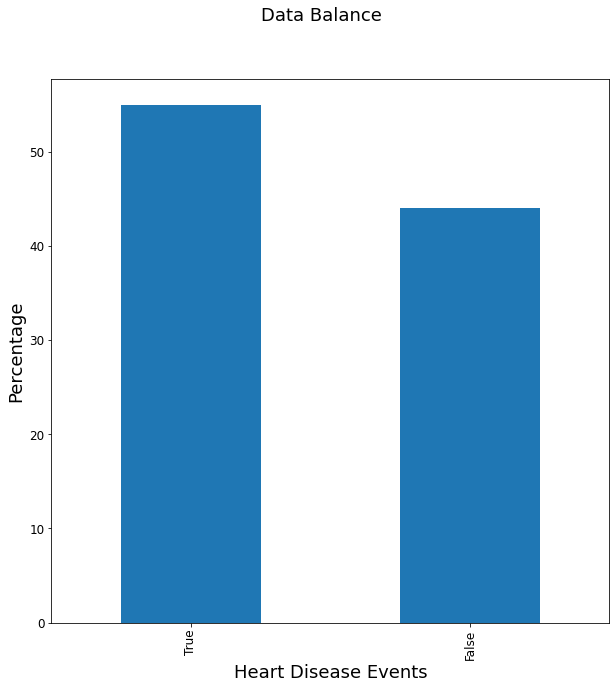

In [10]:
df_copy = Heart_df.copy()
df_copy['HeartDisease'] = Heart_df['HeartDisease'].astype(bool).astype(str)
bar_chart(df_copy['HeartDisease'],'Heart Disease Events', 'Data Balance')

> Yes it's approximately balanced

> Is gender feature is balanced ?

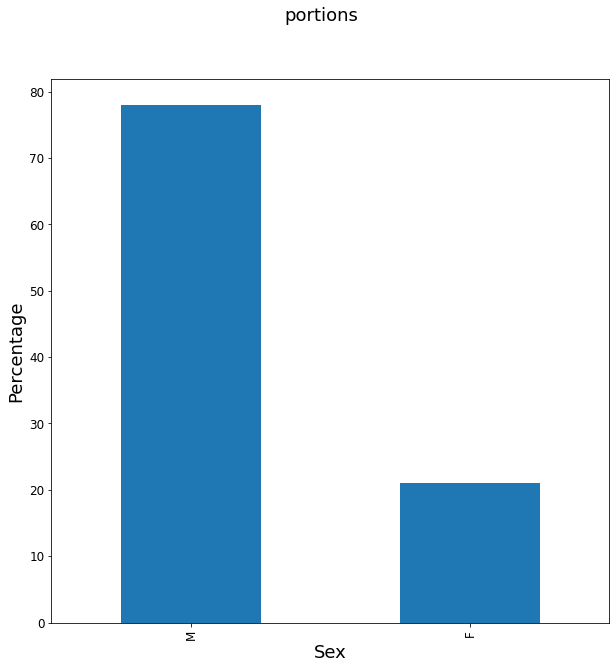

In [11]:
bar_chart(df_copy['Sex'],'Sex','portions')

> Propotion of Males 79% in our data set

> what is propotions of ChestPainType in data set?

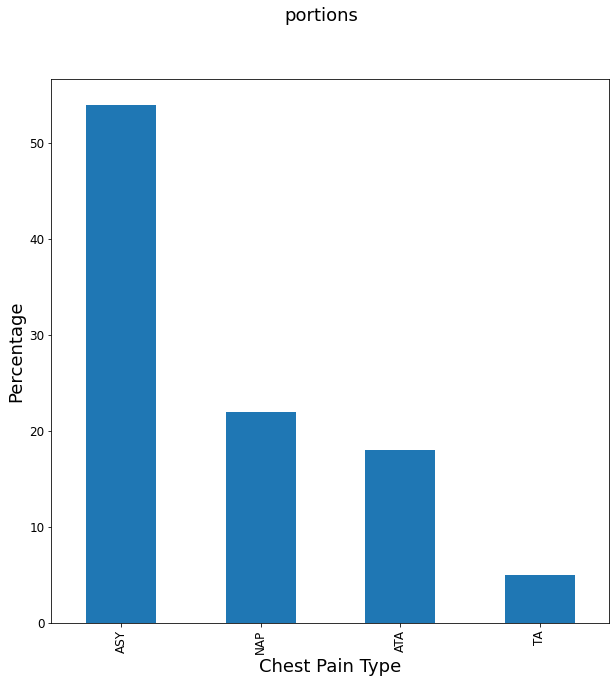

In [12]:
bar_chart(df_copy['ChestPainType'],'Chest Pain Type','portions')

> ASY the most common type of pain and TA the least one 

> what is propotion of RestingECG?

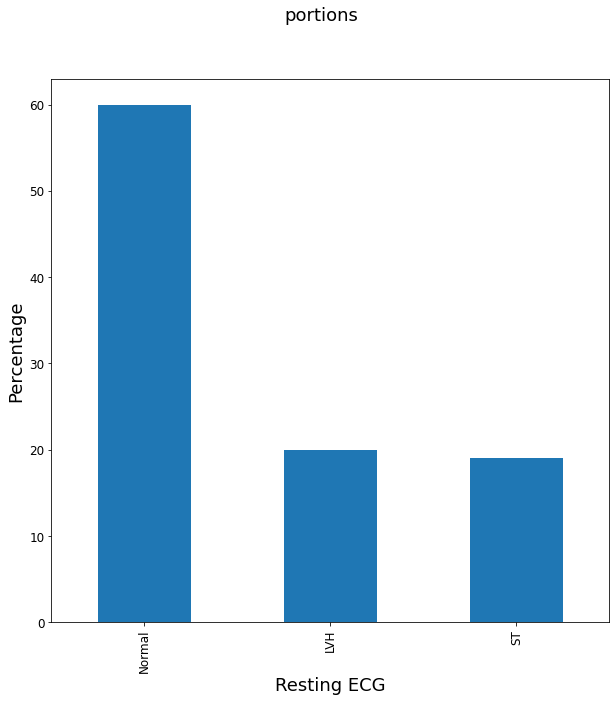

In [13]:
bar_chart(df_copy['RestingECG'],'Resting ECG', 'portions')

**Function citation to:**
<br> https://www.kaggle.com/andreshg/xgboost-optuna-hyperparameter-tunning

In [14]:
def plotting_chart(df, features):
    # Making a chart and parameters like figsize
    
    style.use('fivethirtyeight')
    fig = plt.figure(constrained_layout=True, figsize=(20,20))
    
    # Making 3 columns and 3 rows for graphs
    
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    
    # Preparing histogram
    ax1.set_title('Histogram') # Set the title
    sns.distplot(df.loc[:,features], norm_hist=True, ax = ax1) # plot the histogram
    
    #QQ_plot
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot') # Set the title
    
    stats.probplot(df.loc[:,features], plot = ax2)# Plotting the QQ_Plot
    #Box Plot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot') # Set title
    sns.boxplot(df.loc[:,features], orient='v', ax = ax3 ); # Plotting the box plot

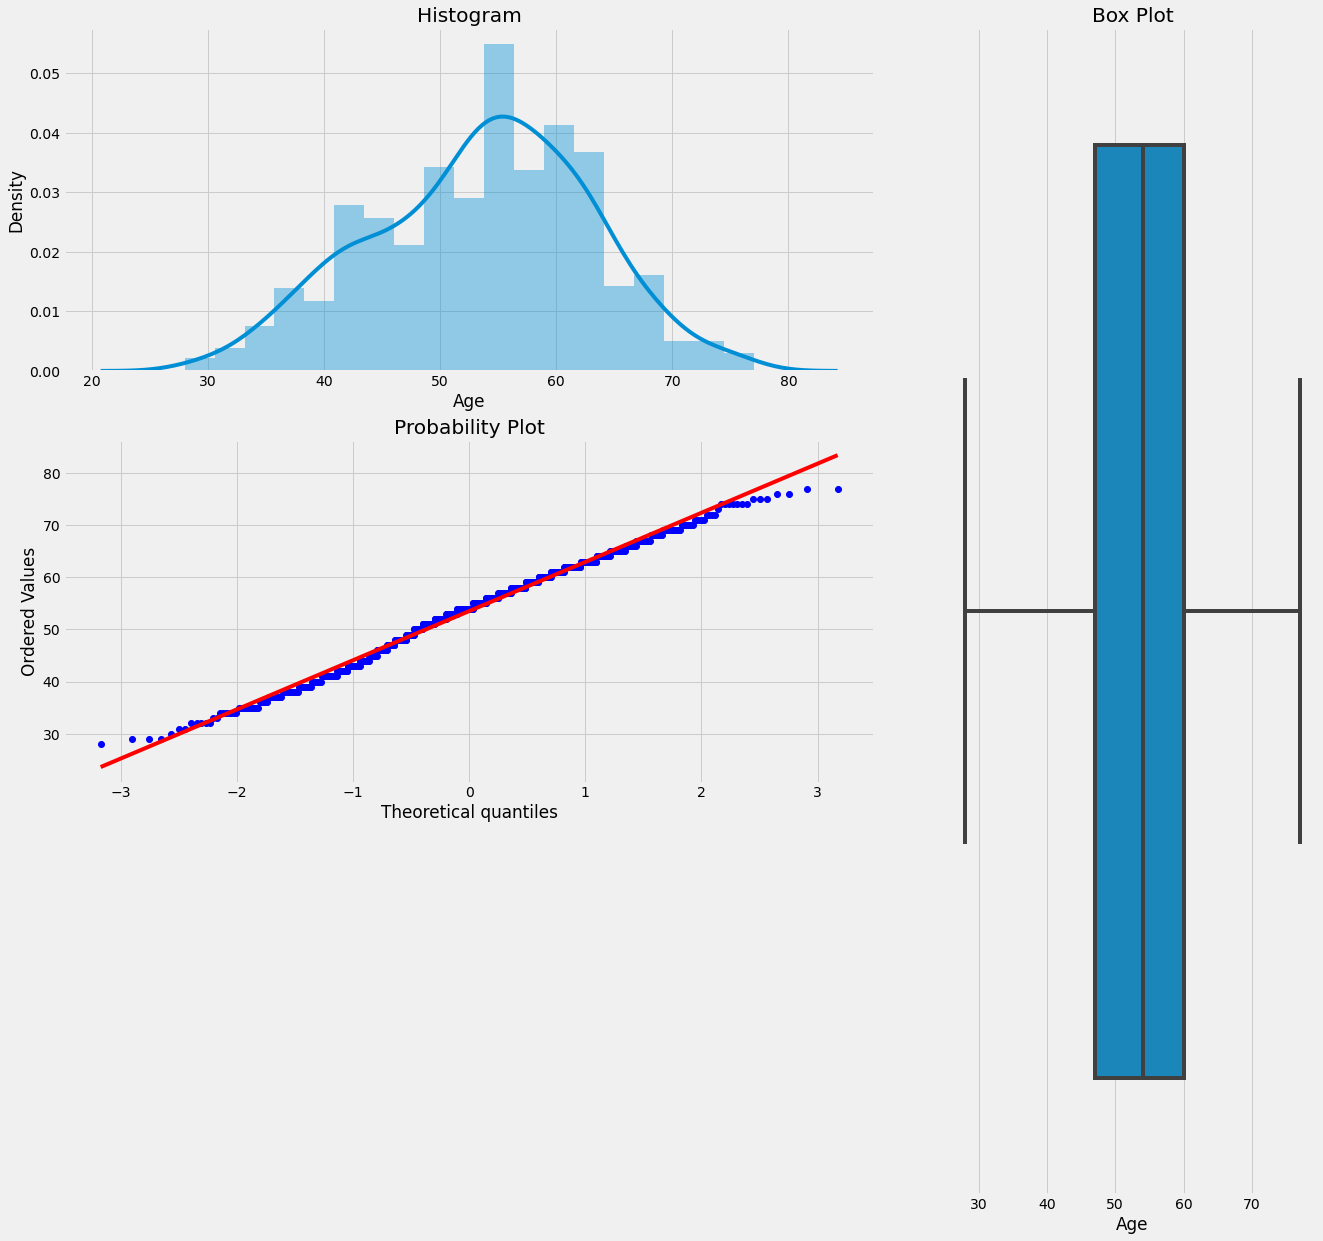

In [15]:
plotting_chart(Heart_df,'Age');

> Age feature doeesn't contain outliers and normally distributed from 28 to 77 years old

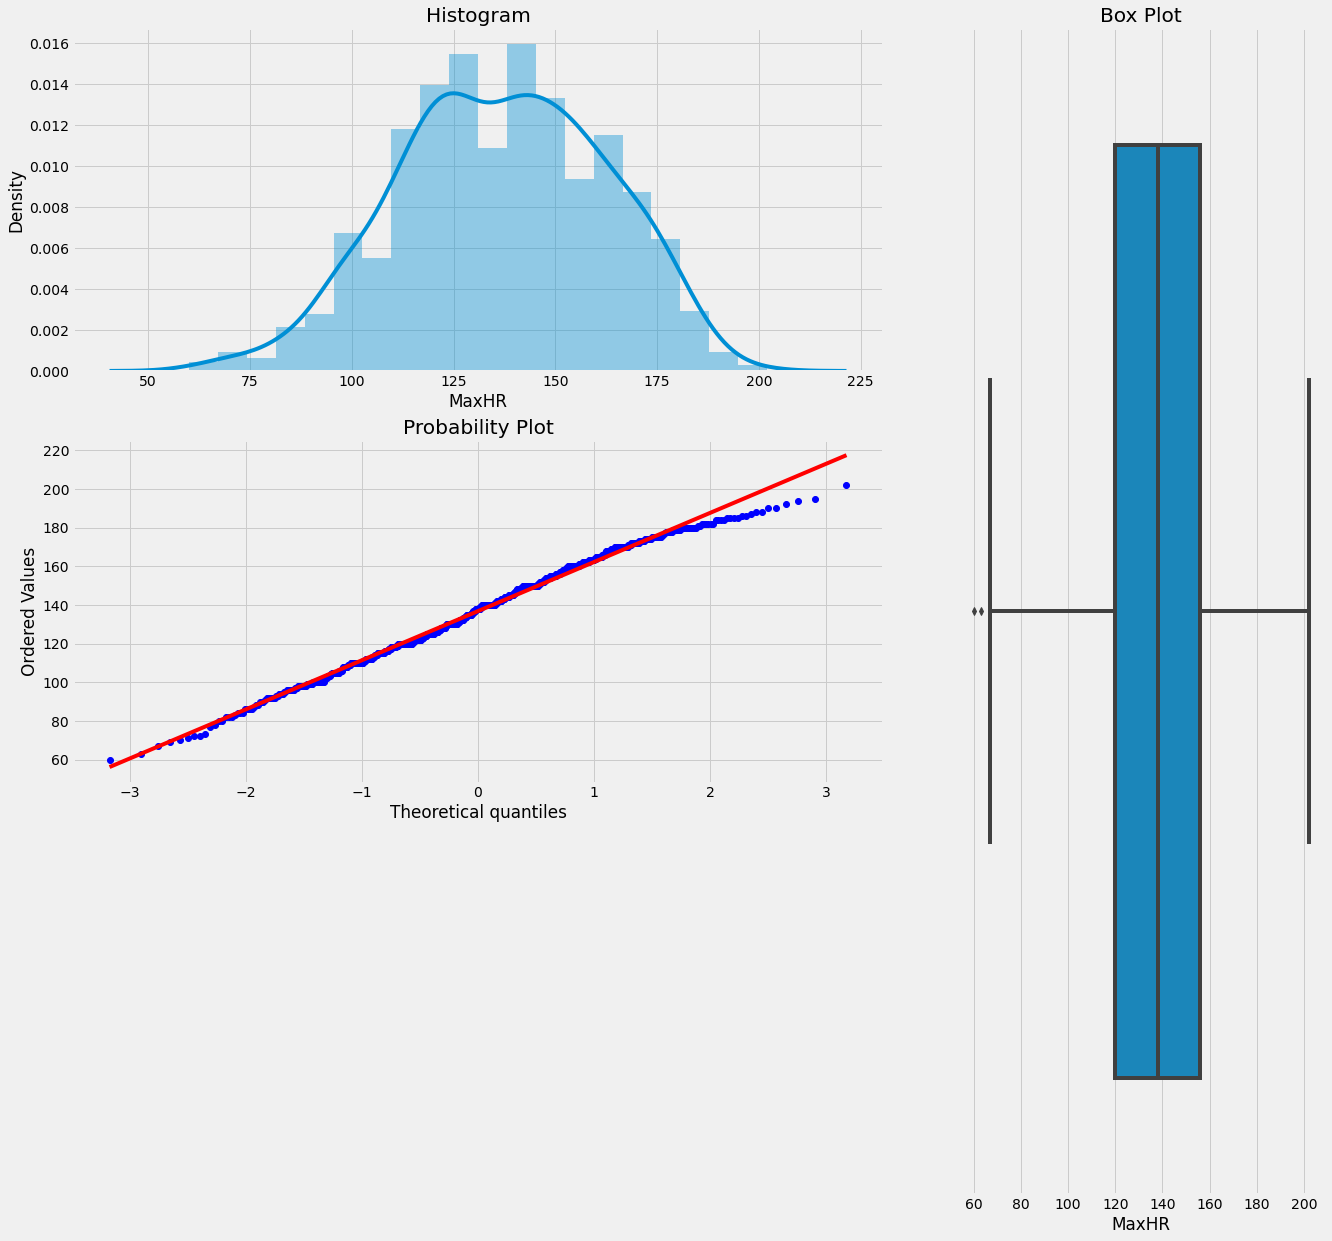

In [16]:
plotting_chart(Heart_df,'MaxHR');

> Maxmimun heart rate ranging normally 

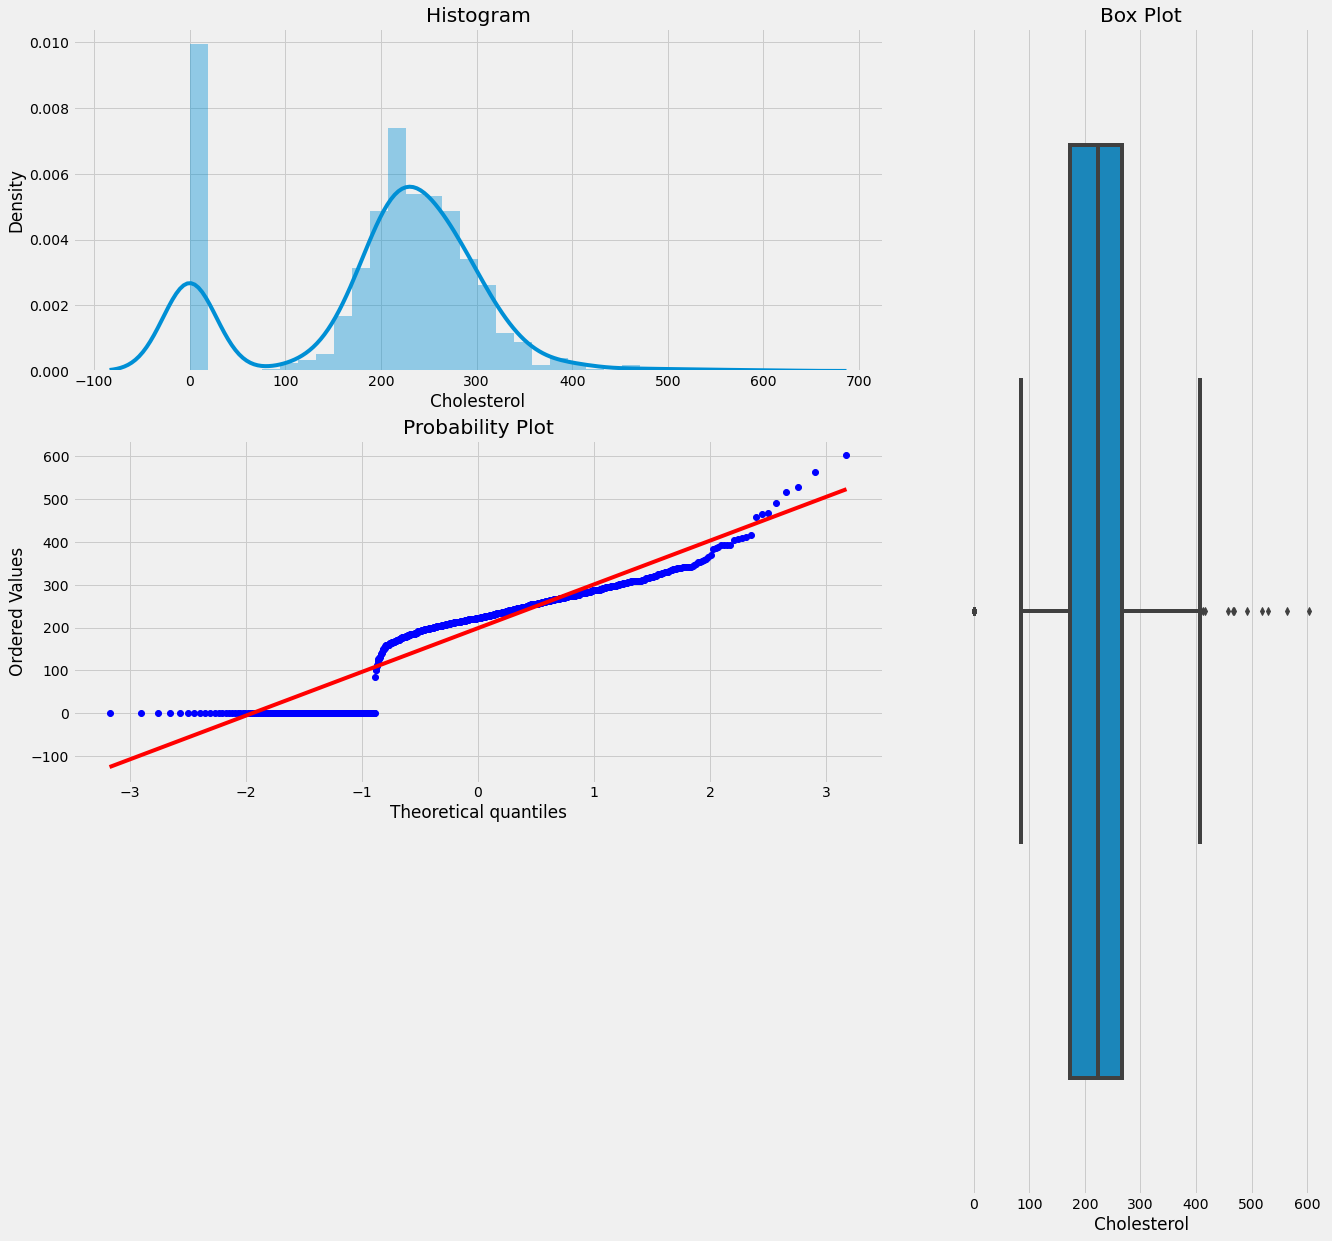

In [17]:
plotting_chart(Heart_df,'Cholesterol')

In [18]:
Heart_df = Heart_df.drop(Heart_df.query("Cholesterol <= 0 or Cholesterol >=600").index.tolist()) #dropping outliers

> Old Peak, [Range: 0-6] so we drop the outliers. 

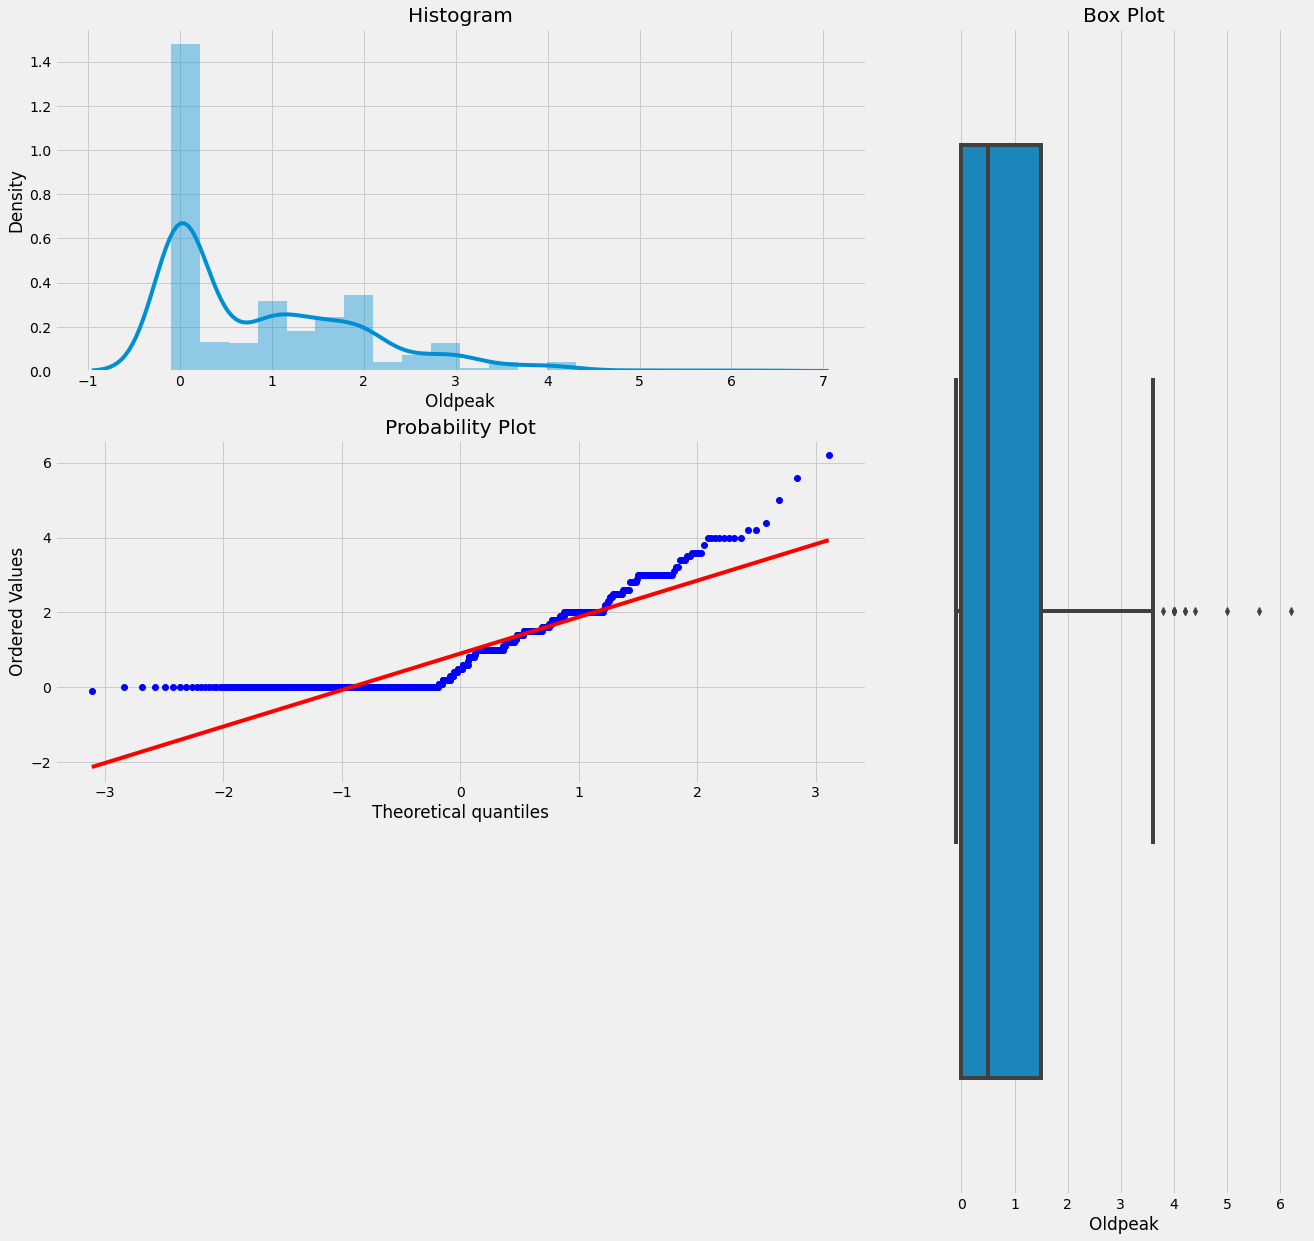

In [19]:
plotting_chart(Heart_df,'Oldpeak')

In [20]:
Heart_df = Heart_df.drop(Heart_df.query("Oldpeak < 0 or Oldpeak > 6").index.tolist()) #dropping outliers

> resting blood pleasure distrubtion

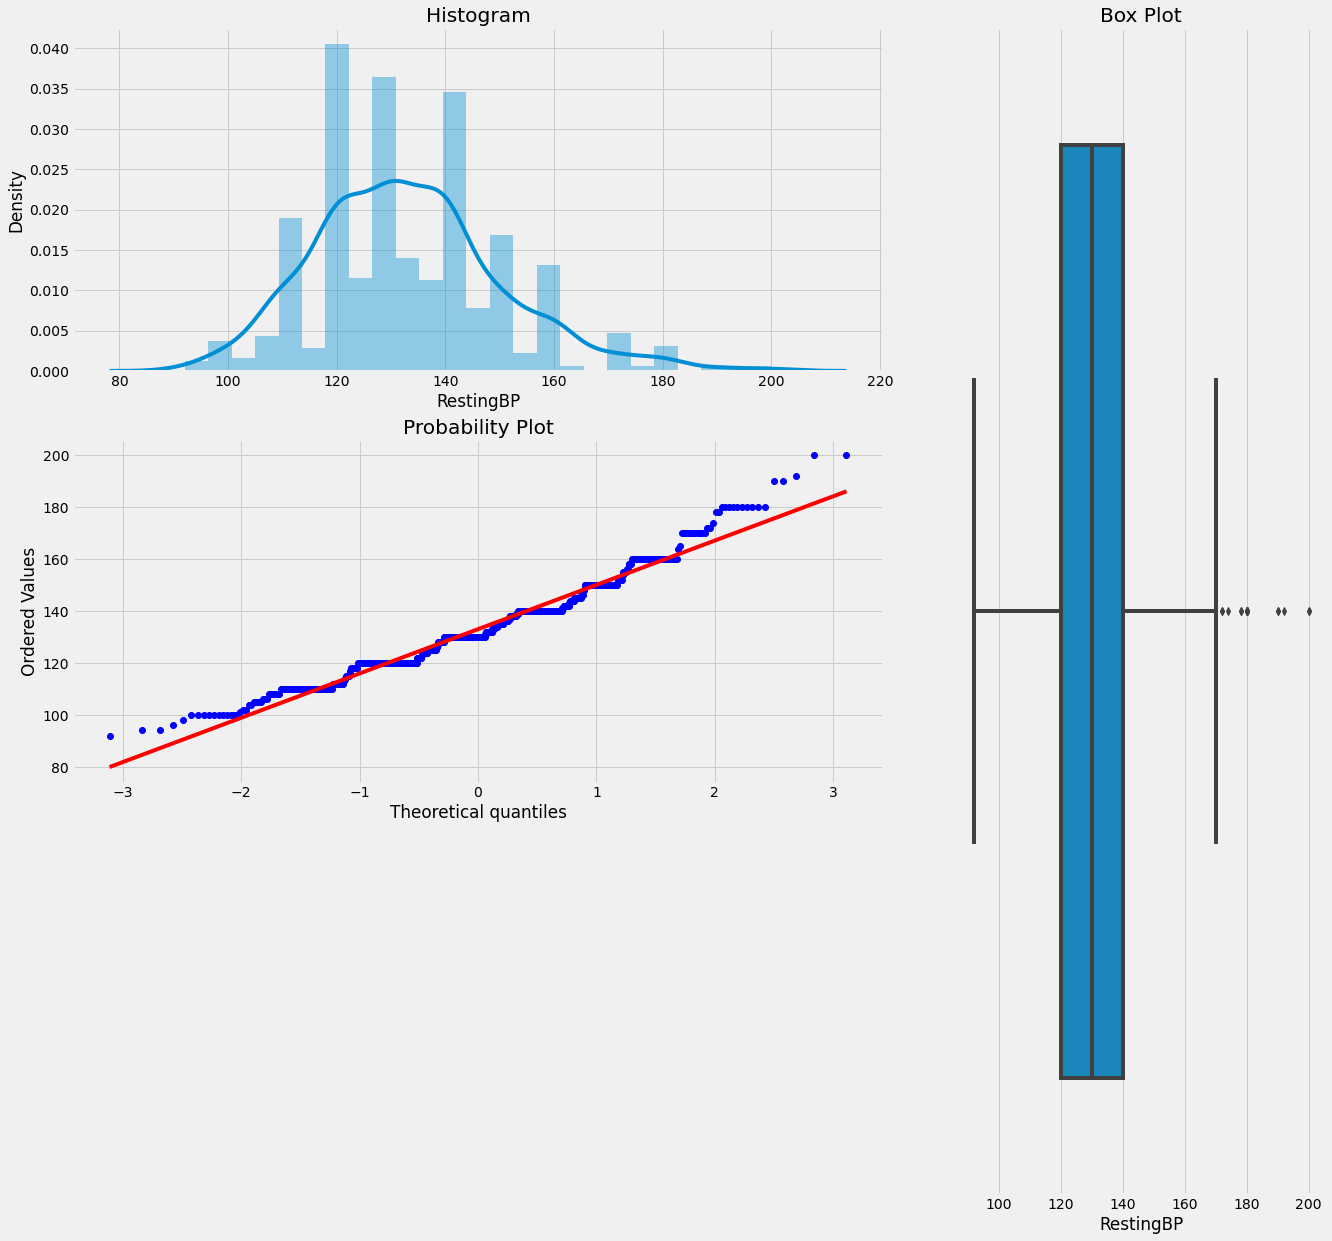

In [21]:
plotting_chart(Heart_df,'RestingBP')

In [22]:
Heart_df.shape #After cleaned

(743, 12)

In [23]:
Heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [24]:
df = Heart_df.copy()

**Bivariate section**

In [25]:
Columns_encoding = []
Columns_leave    = []
for col in Heart_df.columns:
        col_type = Heart_df[col].dtypes
        if col_type == 'object':
            Columns_encoding.append(col)
        else:
            Columns_leave.append(col)
dummy_features = pd.get_dummies(Heart_df[Columns_encoding])
Heart_df.drop(columns = Columns_encoding  , axis = 1, inplace = True)
Heart_df = Heart_df.join(dummy_features)
Heart_df = Heart_df[Columns_leave + dummy_features.columns.tolist()]

            

In [26]:
pd.set_option("display.max_columns", None)
Heart_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [27]:
def make_mi_scores(X,Target):
    for i in range(10):
        X = Heart_df.copy()
        y = X.pop(Target)
        for colname in X.select_dtypes("object"):
            # Label encoding Qualitative features
            X[colname], _ = X[colname].factorize()
        discrete_features = X.dtypes == int # All discrete features should now have integer dtypes
        
        mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
        mi_scores = np.append([mi_scores], [mi_scores], axis=0)
        
    mi_scores = mi_scores.mean(axis=0) # mean of appended values
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)   
    return mi_scores

mi_scores = make_mi_scores(Heart_df, 'HeartDisease')
mi_scores 

ST_Slope_Up          0.276066
ExerciseAngina_Y     0.203246
ST_Slope_Flat        0.200471
ExerciseAngina_N     0.148780
Oldpeak              0.139846
ChestPainType_ASY    0.122421
ChestPainType_ATA    0.113324
Sex_M                0.060421
MaxHR                0.049364
ChestPainType_NAP    0.039160
Age                  0.038242
ST_Slope_Down        0.034055
RestingECG_ST        0.033842
RestingECG_Normal    0.032024
Cholesterol          0.022423
Sex_F                0.017548
RestingBP            0.016574
FastingBS            0.011749
ChestPainType_TA     0.000000
RestingECG_LVH       0.000000
Name: MI Scores, dtype: float64

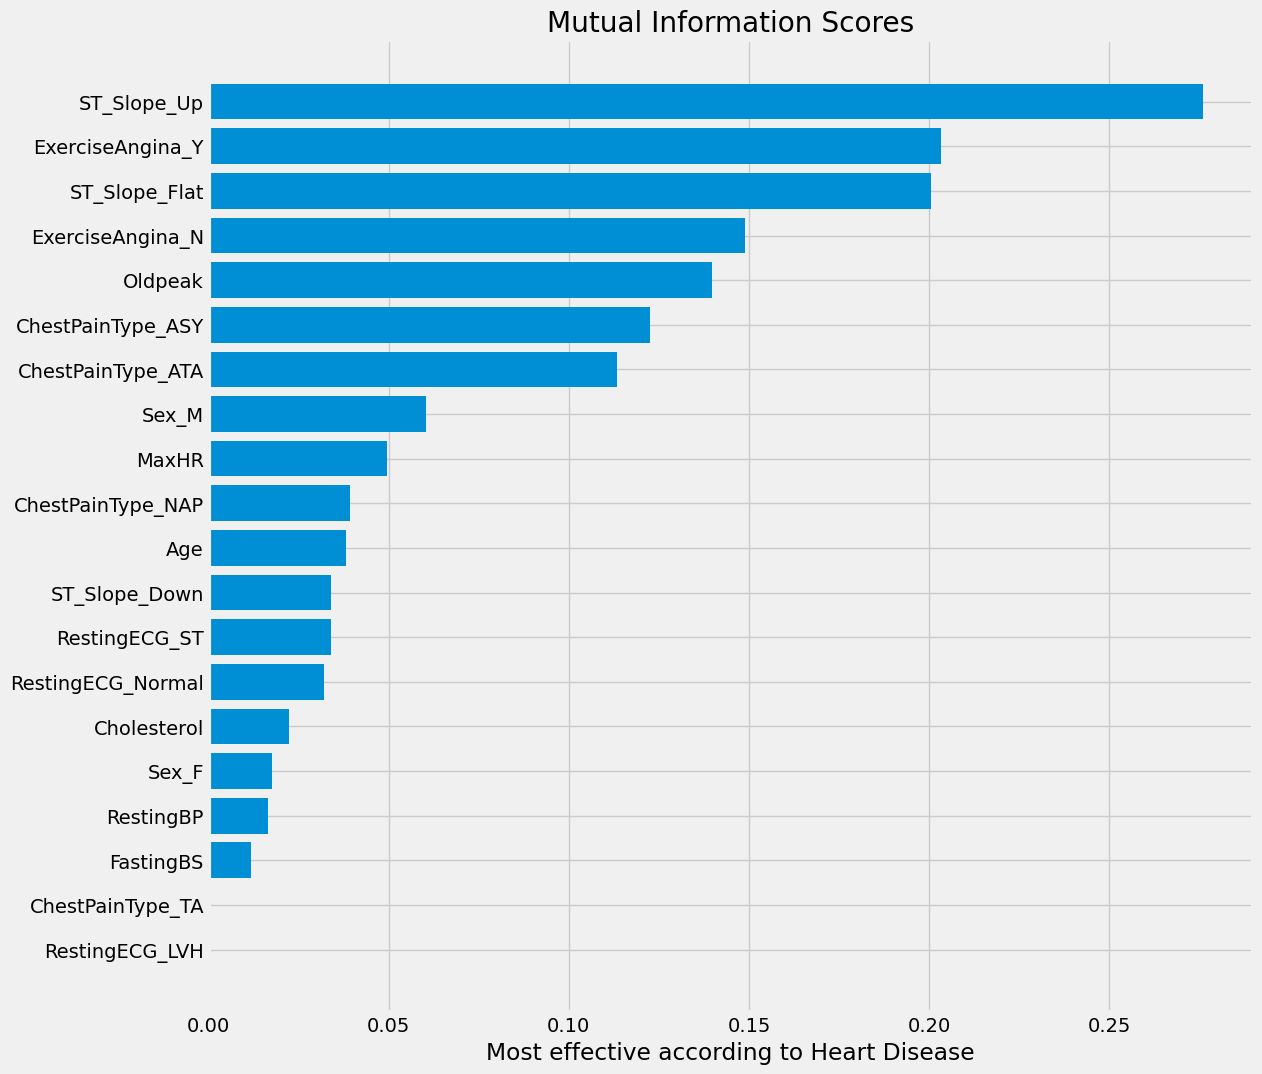

In [28]:
def plot_mi_scores(scores):
    #Preparing to plot
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.xlabel('Most effective according to Heart Disease');

plt.figure(dpi=100, figsize=(12, 12))
plot_mi_scores(mi_scores)

> Most effictive features shows that RestingECG is usless and S_T slope is the most effictive using mutual information

In [29]:
Heart_df.drop(columns = ['RestingECG_ST', 'RestingECG_Normal', 'RestingECG_LVH'], axis = 1, inplace = True)

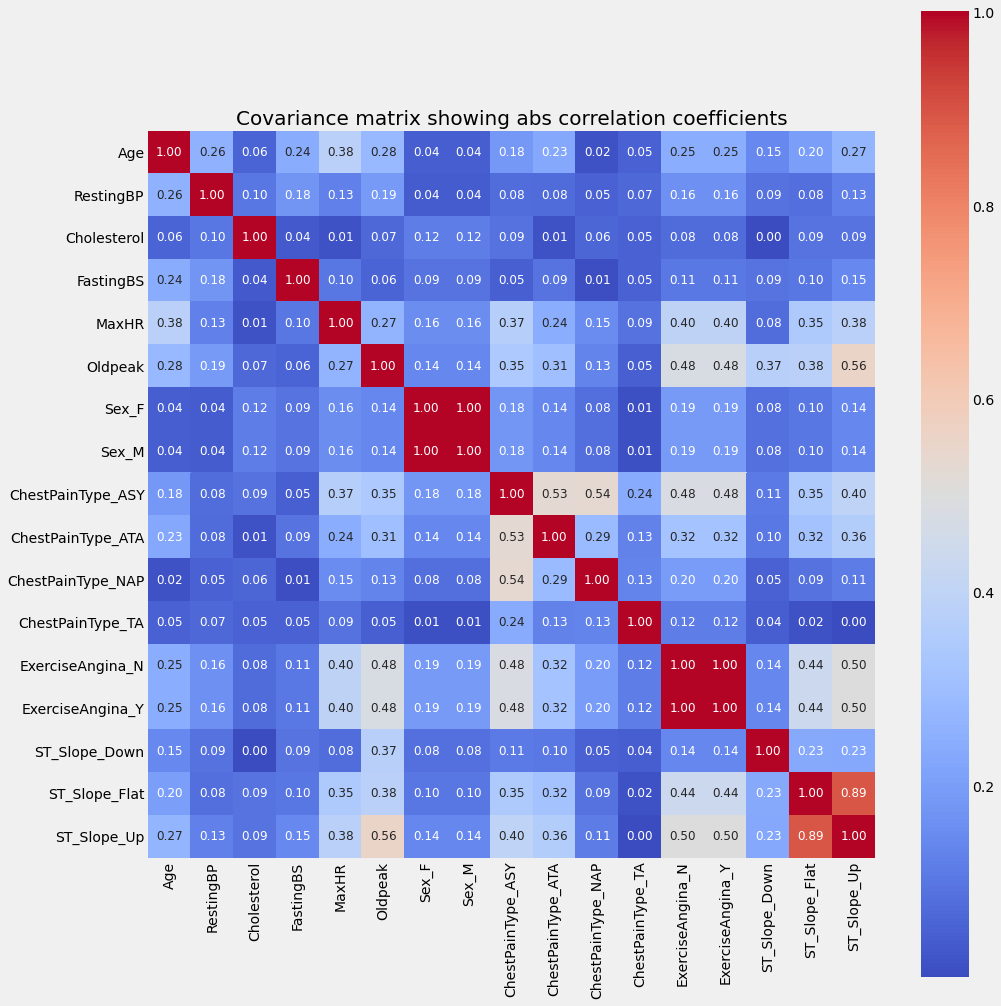

In [30]:
Columns = Heart_df.drop(columns = ['HeartDisease'], axis = 1).columns
X = Heart_df.drop(columns = ['HeartDisease'], axis = 1)
y = Heart_df['HeartDisease']
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(scaled)

Correlation = pca.get_covariance()

fig, ax = plt.subplots(figsize= (15,15))
sns.heatmap(tf.math.abs(Correlation),
                     cbar=True,
                     annot=True,
                     square=True,
                     fmt='.2f',
                     annot_kws={'size': 12},
                     cmap='coolwarm',                 
                     yticklabels = Columns,
                     xticklabels = Columns,
                     ax = ax)
plt.title('Covariance matrix showing abs correlation coefficients', size = 20)
plt.tight_layout()
plt.show()

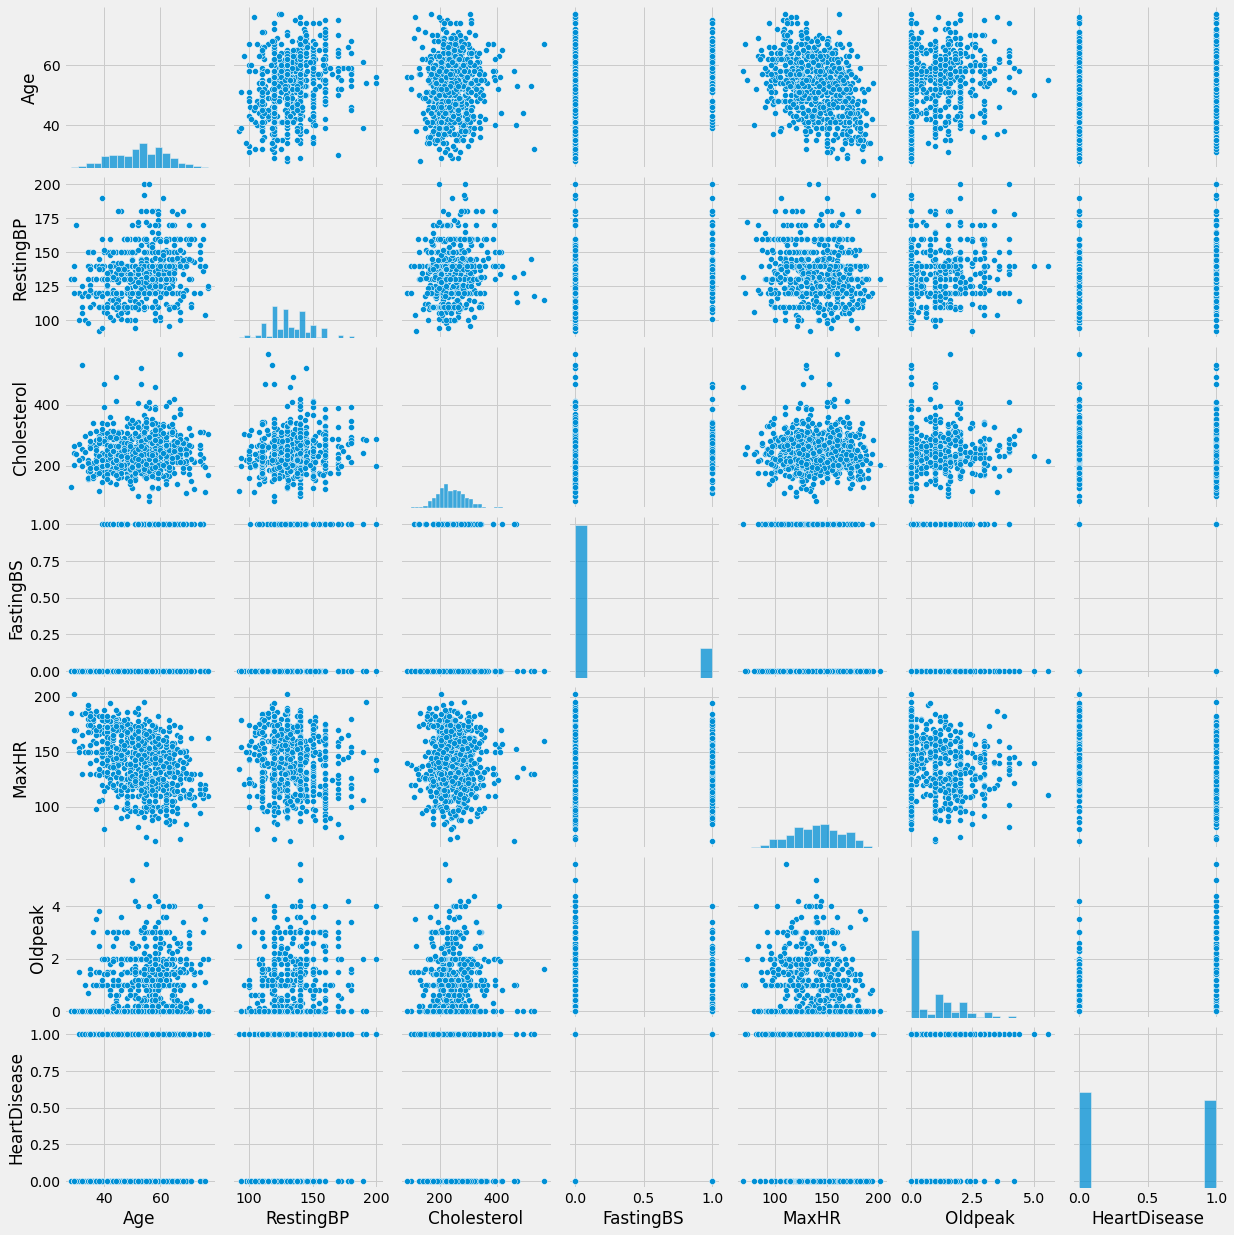

In [31]:
sns.pairplot(df)

Percentage of Explained Variance using covariance matrix if we used 7 Components is:74.53299623474678%

Percentage of Explained Variance using covariance matrix if we used 8 Components is:80.05557690682666%

Percentage of Explained Variance using covariance matrix if we used 9 Components is:85.17296885743282%

Percentage of Explained Variance using covariance matrix if we used 10 Components is:90.02620015822868%

Percentage of Explained Variance using covariance matrix if we used 11 Components is:94.39602799168937%

Percentage of Explained Variance using covariance matrix if we used 12 Components is:97.58061910658779%



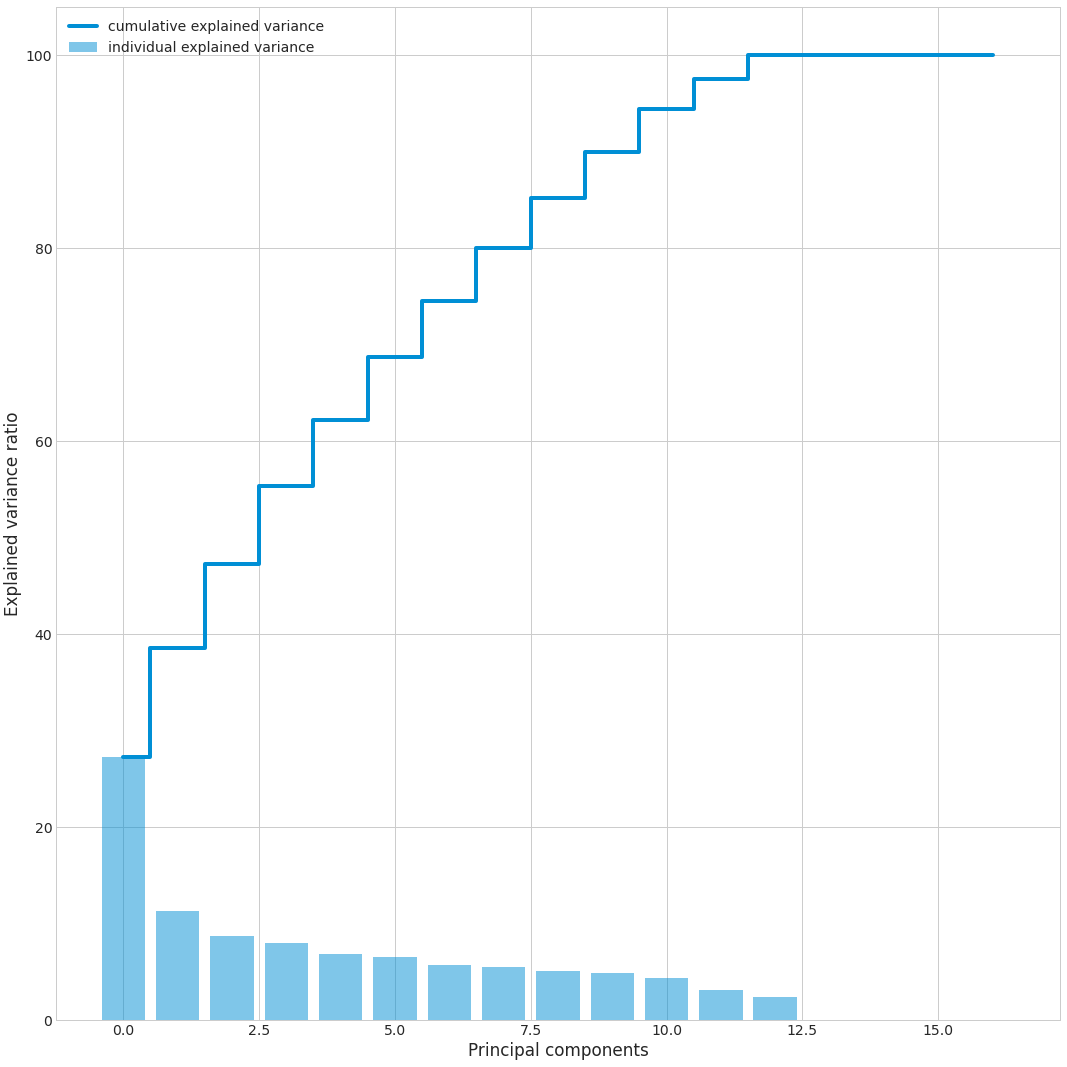

In [32]:
'''Percentage of Explained Variance using covariance matrix'''
eig_vals , eig_vecs = np.linalg.eig(Correlation)
        
start = 6
end   = 12
figs  = (15,15)

Explained_Var = [(i / sum(eig_vals))*100 for i in sorted(eig_vals, reverse=True)]
cum_Explained_Var = np.cumsum(Explained_Var)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=figs)

    plt.bar(range(X.shape[1]), Explained_Var, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(X.shape[1]), cum_Explained_Var, where='mid',
                label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    for i in range(start,end,1):
        print('Percentage of Explained Variance using covariance matrix if we used %s Components is:'%(i+1) +str(cum_Explained_Var[i])+'%'+'\n')

> We can do transformation to 12 dimension space

**For classification approach there is 2 approaches SVM is consider the best binary classifier we have until today even better than deep perceptrons models as it can answer the question of what's the perfect line, surface, or hyper-dimension-surface as it's the best classifer that maximise the margine by minimizing norm(weight), However classical SVM works only for lineary separable problems, However by using kernal trik by transforming or information to higher dimension we still able to classify very well
As it's a binary classifcation problem we can safely say SVM is the best approach and XGBOOST based in random forest which is great dealing with features conessit of yes/no I choose XGBOOST as it's faster to implement**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state=42)

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
#Setting parameters
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.7423,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=10000, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print ('model accuracy on predicting is: '+str(accuracy)+'%')

model accuracy on predicting is: 84.30493273542601%


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[98, 19],
       [16, 90]], dtype=int64)

> Citation to:
<br> https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

In [38]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

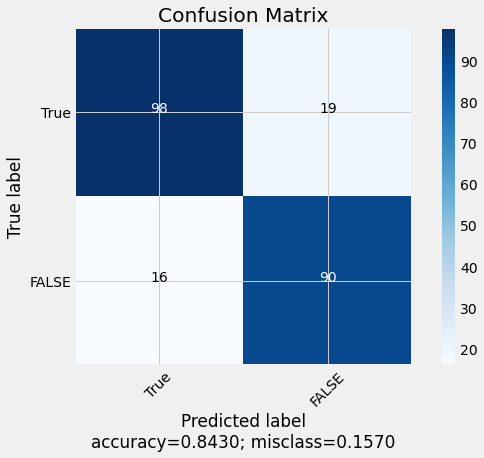

In [40]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_pred), 
                      normalize    = False,
                      target_names = ['True', 'FALSE'],
                      title        = "Confusion Matrix")

**Multivariate section**

In [43]:
def Pie_chart(df,c,target):
    fig, ax = plt.subplots(ncols=df[c].nunique(), figsize=(12,12))
    p = 0
    for i in df[c].unique():
        ax[p].set_title('-'*20+'\n'+str(c)  +' : '+ str(i) +'\nAccording to HeartDisease', size=11, fontweight='heavy')
        patches, texts, pcts = ax[p].pie(df[df[c]==i][target].value_counts().values,
                labels=df[df[c]==i][target].value_counts().index,
                    autopct="%1.2f%%", startangle=90, colors=['white', 'blue'],
                    wedgeprops={"edgecolor":"black"})
        plt.setp(pcts, **{'color':'black','weight':'heavy','size':14})
        p += 1 

> Which Gender is more likely to get Heart disease

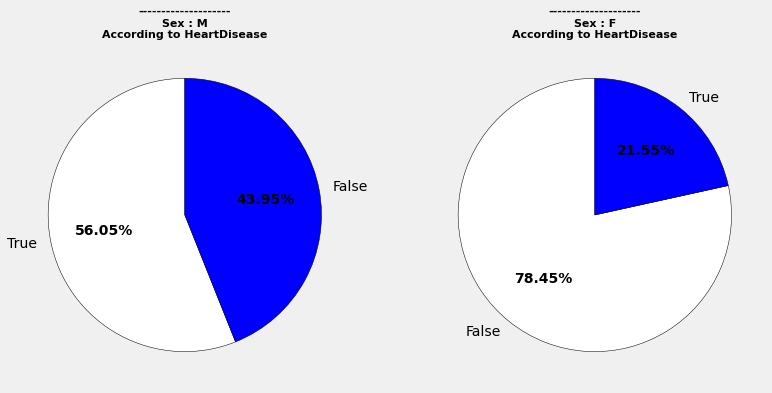

In [44]:
df_copy = df.copy()
df_copy['HeartDisease'] = df['HeartDisease'].astype(bool).astype(str)
Pie_chart(df_copy,'Sex','HeartDisease')

**Men are most likely**

> does chest pain type effect?

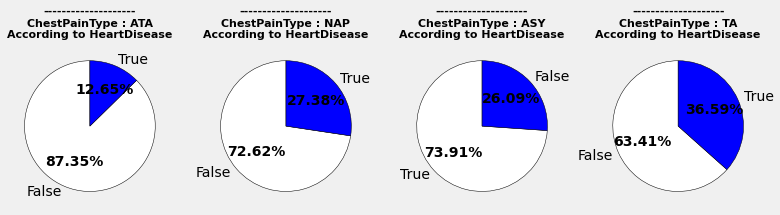

In [45]:
Pie_chart(df_copy,'ChestPainType','HeartDisease')

**Yes, it does**

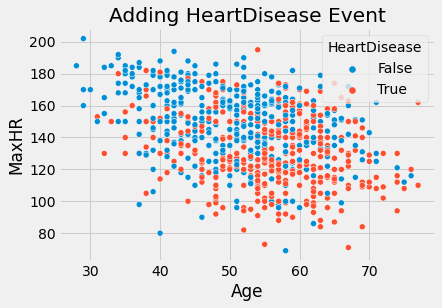

In [46]:
plt.title('Adding HeartDisease Event');
sns.scatterplot(data = df_copy, x = "Age", y = "MaxHR" , hue = "HeartDisease");

**Heart disease more likley in old age despite Max heart rate**